# 📊 Task Management System - Exploratory Data Analysis

## 🎯 Project Objective

This analysis aims to extract actionable insights from a task management dataset to optimize team productivity, resource allocation, and project delivery. By analyzing task completion patterns, team performance, and workload distribution, we will:

- **Identify bottlenecks** in task completion and resource utilization
- **Understand task characteristics** that impact delivery time and success rates
- **Optimize resource allocation** based on team performance and workload
- **Improve estimation accuracy** by analyzing estimated vs. actual hours
- **Enhance project planning** through data-driven insights

---

## 📋 Business Context

### Dataset Overview
This dataset contains **25,000 tasks** from a software development organization, tracking various aspects of task management including:

**Task Attributes:**
- Task identification (ID, title, description)
- Classification (category, priority, status)
- Timeline (created date, due date)
- Effort metrics (estimated hours, actual hours, story points)

**Resource Attributes:**
- Team assignment (assigned_to, reporter, team)
- Sprint planning (sprint, component)
- User metrics (workload, experience, completion rate)
- Collaboration indicators (number of comments)

### Key Business Questions:
1. **What is the distribution of tasks across categories, priorities, and teams?**
2. **How do estimated hours compare to actual hours?**
3. **Which teams or users have the highest completion rates?**
4. **Is there a relationship between user experience and task completion efficiency?**
5. **How does task priority affect estimated effort and actual delivery?**
6. **Are there patterns in missing data that indicate process gaps?**

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-management/TASK MANAGEMENT.csv


## 📜 Step 1: Data Loading & Initial Inspection

In this section, we will:
- Load the task management dataset from CSV
- Display the first few rows to understand the data structure
- Check column names, data types, and basic information
- Identify initial data quality indicators

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/task-management/TASK MANAGEMENT.csv')

# Display the first five rows
print("First 5 rows:")
print(df.head())

# Show column information
print("\nColumn information:")
df.info()

First 5 rows:
       task_id                     task_title  \
0  TASK-000001             Debug dashboard UI   
1  TASK-000002  Implement notification system   
2  TASK-000003           Design data pipeline   
3  TASK-000004            Update dashboard UI   
4  TASK-000005           Debug CI/CD pipeline   

                                    task_description     category  priority  \
0  Debug dashboard UI as per client requirements....      Bug Fix  Critical   
1  Implement notification system to resolve issue...       Design  Critical   
2  Design data pipeline to improve system functio...      Testing    Medium   
3  Update dashboard UI as per client requirements...  Enhancement       Low   
4  Enhancement request: Debug CI/CD pipeline. Sho...  Development    Medium   

        status created_date    due_date  estimated_hours  actual_hours  \
0    Completed   2024-08-08  2024-08-10                2           2.9   
1  In Progress   2025-01-03  2025-01-08               40           N

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 🧹 Step 2: Data Cleaning

In this section, we will:
- Check for duplicate records and remove them
- Identify missing values across all columns
- Understand the pattern of missing data (especially in `actual_hours` which is only filled for completed tasks)
- Verify data quality metrics after cleaning
- Document the final shape and structure of the cleaned dataset

### Expected Outcome:
- Clean dataset ready for analysis
- Clear understanding of missing data patterns
- Documented data quality metrics

In [3]:
# Perform basic data cleaning
print("Data cleaning started...\n")

# Check initial shape
print(f"Initial shape: {df.shape}")
print(f"Initial duplicates: {df.duplicated().sum()}\n")

# Drop duplicates
df = df.drop_duplicates()
print(f"Shape after dropping duplicates: {df.shape}")

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values in actual_hours
# Since actual_hours is only filled for completed tasks, we'll keep NaN for non-completed tasks
print("\nHandling missing values:")
print(f"- actual_hours has {df['actual_hours'].isnull().sum()} missing values")
print("- These are expected for tasks that are not completed yet, so we'll keep them as NaN")

# Print cleaned data summary
print("\n" + "="*50)
print("CLEANED DATA SUMMARY")
print("="*50)
print(f"Final shape: {df.shape}")
print(f"Total duplicates remaining: {df.duplicated().sum()}")
print(f"\nMemory usage:")
df.info(memory_usage='deep')
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Data cleaning started...

Initial shape: (25000, 20)
Initial duplicates: 0

Shape after dropping duplicates: (25000, 20)

Missing values per column:
task_id                       0
task_title                    0
task_description              0
category                      0
priority                      0
status                        0
created_date                  0
due_date                      0
estimated_hours               0
actual_hours              16123
assigned_to                   0
reporter                      0
team                          0
story_points                  0
sprint                        0
component                     0
user_workload                 0
user_experience_months        0
user_completion_rate          0
num_comments                  0
dtype: int64

Handling missing values:
- actual_hours has 16123 missing values
- These are expected for tasks that are not completed yet, so we'll keep them as NaN

CLEANED DATA SUMMARY
Final shape: (25000, 20)


## 🔍 Step 3: Exploratory Data Analysis (EDA)

Now that we have a clean dataset, we'll perform comprehensive EDA to uncover patterns, relationships, and insights that will drive data-driven decision making.

### Analysis Roadmap:

1. **Missing Data Visualization** - Visualize and analyze missing value patterns
2. **Univariate Analysis** - Understand the distribution of individual variables
   - Categorical variables (category, priority, status, team)
   - Numerical variables (estimated_hours, actual_hours, story_points, user metrics)
3. **Bivariate Analysis** - Explore relationships between variables
   - Tasks by team and priority
   - Estimated vs. actual hours by category
   - User experience impact on completion rates
   - Priority impact on task duration
4. **Key Business Insights** - Summarize findings and actionable recommendations

---

In [4]:
# ============================================================
# IMPORT VISUALIZATION LIBRARIES
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration for better visualizations
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10

print("✅ Visualization libraries imported successfully!\n")

✅ Visualization libraries imported successfully!



## 🧠 Step 4: NLP Preprocessing (Text Cleaning)

In this section, we will perform comprehensive Natural Language Processing (NLP) preprocessing on the `task_description` column to prepare the text data for machine learning classification.

### 🎯 Objectives:
- Convert raw task descriptions into clean, normalized text suitable for ML models
- Reduce dimensionality while preserving semantic meaning
- Create a new column `clean_task_description` with processed text

### 📋 NLP Preprocessing Steps:

**1. Lowercase Conversion**
   - Convert all text to lowercase for consistency
   - Example: "Fix Bug" → "fix bug"

**2. Special Character Removal**
   - Remove punctuation, digits, and special characters
   - Keep only alphabetic characters and spaces
   - Example: "Update API-v2.0" → "update api v"

**3. Tokenization**
   - Split text into individual words (tokens)
   - Example: "fix the bug" → ["fix", "the", "bug"]

**4. Stopword Removal**
   - Remove common English words (the, is, at, etc.) that don't add semantic value
   - Example: ["fix", "the", "bug"] → ["fix", "bug"]

**5. Lemmatization**
   - Convert words to their root form
   - Example: "running", "runs", "ran" → "run"
   - Preserves semantic meaning better than stemming

**6. Short Word Filtering**
   - Remove tokens with less than 3 characters
   - Eliminates noise and meaningless tokens

### 📊 Expected Outcome:
- Clean, normalized text ready for feature extraction
- Reduced vocabulary size while preserving meaning
- Enhanced model performance and reduced training time

In [5]:
# ============================================================
# NLP PREPROCESSING ON task_description COLUMN
# ============================================================

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
print("Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("✅ NLTK data downloaded successfully!\n")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

print("Starting NLP preprocessing...\n")

def preprocess_text(text):
    """
    Perform NLP preprocessing: tokenization, stopword removal, and lemmatization
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits, keep only alphabets and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word not in stop_words and len(word) > 2
    ]
    
    # Join tokens back to string
    return ' '.join(cleaned_tokens)

# Apply preprocessing to task_description column
df['clean_task_description'] = df['task_description'].apply(preprocess_text)

print("="*70)
print("NLP PREPROCESSING COMPLETED")
print("="*70)
print(f"\nTotal tasks processed: {len(df)}")
print(f"New column 'clean_task_description' added to dataframe\n")

# Print sample of original vs cleaned data
print("\nSample comparison (Original vs Cleaned):")
print("="*70)
for i in range(5):
    print(f"\n[Task {i+1}]")
    print(f"Original: {df['task_description'].iloc[i][:100]}...")
    print(f"Cleaned:  {df['clean_task_description'].iloc[i][:100]}...")
    print("-"*70)

# Display statistics about cleaned text
print("\nCleaned text statistics:")
print(f"Average token count: {df['clean_task_description'].str.split().str.len().mean():.2f}")
print(f"Max token count: {df['clean_task_description'].str.split().str.len().max()}")
print(f"Min token count: {df['clean_task_description'].str.split().str.len().min()}")

✅ NLTK data downloaded successfully!

Starting NLP preprocessing...

NLP PREPROCESSING COMPLETED

Total tasks processed: 25000
New column 'clean_task_description' added to dataframe


Sample comparison (Original vs Cleaned):

[Task 1]
Original: Debug dashboard UI as per client requirements. Must follow best practices and coding standards....
Cleaned:  debug dashboard per client requirement must follow best practice coding standard...
----------------------------------------------------------------------

[Task 2]
Original: Implement notification system to resolve issues reported in production environment....
Cleaned:  implement notification system resolve issue reported production environment...
----------------------------------------------------------------------

[Task 3]
Original: Design data pipeline to improve system functionality and user experience. Requires coordination with...
Cleaned:  design data pipeline improve system functionality user experience requires coordination te

🛠️ Starting Feature Extraction & Task Classification...

Dataset shape after removing empty descriptions: (25000, 21)
✅ Using 'category' as target variable
Categories: ['Bug Fix' 'Design' 'Testing' 'Enhancement' 'Development' 'DevOps'
 'Documentation' 'Research' 'Security' 'Maintenance']
Category distribution:
category
Development      6210
Bug Fix          4986
Enhancement      3786
Testing          2991
Documentation    2010
DevOps           1993
Research         1215
Design           1042
Security          514
Maintenance       253
Name: count, dtype: int64

📊 Step 1: TF-IDF Feature Extraction
TF-IDF matrix shape: (25000, 526)
Number of features: 526
Number of samples: 25000

📊 Step 2: Train-Test Split
Training set size: 20000
Test set size: 5000
Training set distribution:
category
Development      4968
Bug Fix          3989
Enhancement      3029
Testing          2393
Documentation    1608
DevOps           1594
Research          972
Design            834
Security          411
Mainte

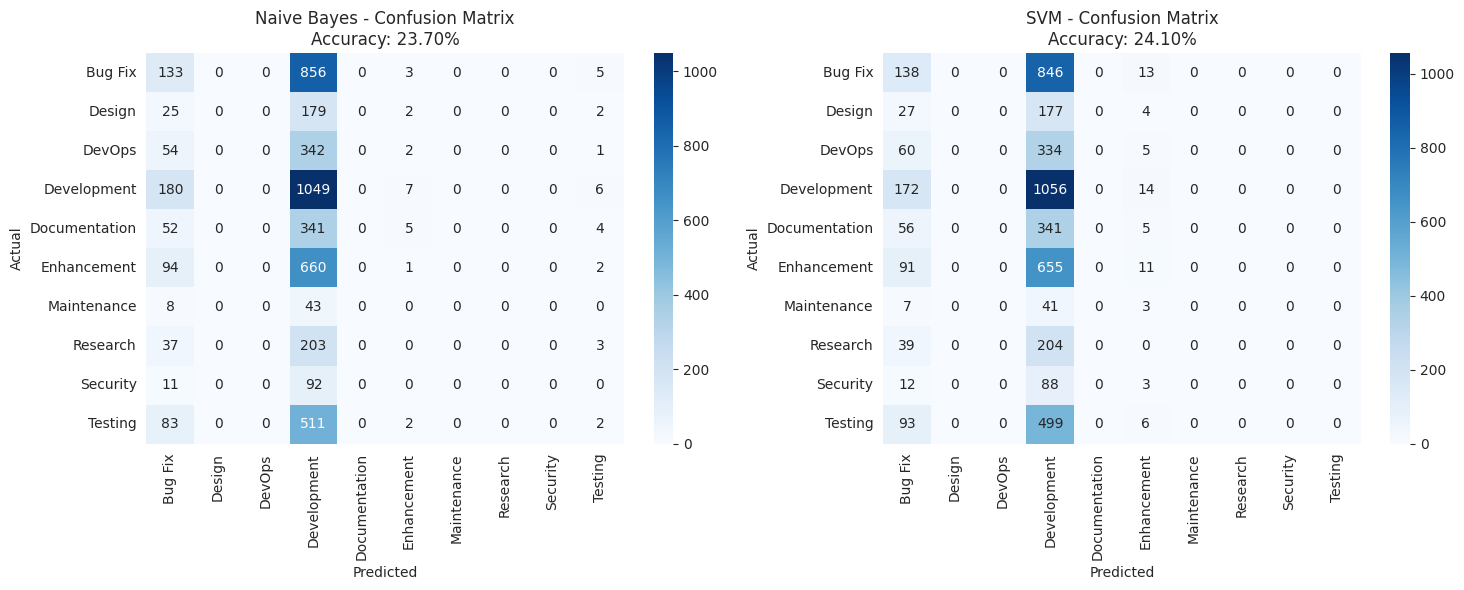


📊 Model Performance Comparison
      Model  Accuracy  Accuracy_Percent
Naive Bayes     0.237              23.7
        SVM     0.241              24.1

🏆 BEST MODEL: SVM
   Best Accuracy: 0.2410 (24.10%)

⚠️  IMPROVEMENT NEEDED: Consider:
   • Hyperparameter tuning
   • Feature engineering
   • More advanced preprocessing
   • Different algorithms (Random Forest, Gradient Boosting)

✅ Feature Extraction & Classification Complete!


In [6]:
# ============================================================
# FEATURE EXTRACTION & TASK CLASSIFICATION
# ============================================================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🛠️ Starting Feature Extraction & Task Classification...\n")

# Check if we have the cleaned text column
if 'clean_task_description' not in df.columns:
    print("❌ Error: clean_task_description column not found. Please run NLP preprocessing first.")
    print("For demonstration, we'll use the original task_description column.\n")
    
    # Create a simple preprocessing for demo purposes
    df['clean_task_description'] = df['task_description'].fillna('').str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)

# Remove rows with empty descriptions
df_clean = df[df['clean_task_description'].str.len() > 0].copy()
print(f"Dataset shape after removing empty descriptions: {df_clean.shape}")

# Choose target variable (category for classification)
# Let's use 'category' as our target variable
target_column = 'category'
if target_column not in df_clean.columns:
    print(f"❌ Error: {target_column} column not found.")
    print("Available columns:", df_clean.columns.tolist())
else:
    print(f"✅ Using '{target_column}' as target variable")
    print(f"Categories: {df_clean[target_column].unique()}")
    print(f"Category distribution:")
    print(df_clean[target_column].value_counts())
    print()

# Step 1: TF-IDF Feature Extraction
print("📊 Step 1: TF-IDF Feature Extraction")
print("=" * 40)

vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 features
    min_df=2,          # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,        # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2), # Include unigrams and bigrams
    stop_words='english'
)

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df_clean['clean_task_description'])
y = df_clean[target_column]

print(f"TF-IDF matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print()

# Step 2: Train-Test Split
print("📊 Step 2: Train-Test Split")
print("=" * 30)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set distribution:")
print(y_train.value_counts())
print()

# Step 3: Model Training
print("🤖 Step 3: Model Training")
print("=" * 25)

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': accuracy, 'predictions': y_pred}
    
    print(f"✅ {name} trained successfully")
    print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "=" * 50)
print("📈 CLASSIFICATION RESULTS SUMMARY")
print("=" * 50)

# Display results for each model
for name, result in results.items():
    accuracy = result['accuracy']
    print(f"\n🤖 {name.upper()} CLASSIFIER")
    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    if accuracy >= 0.85:
        print("✅ TARGET ACHIEVED: Accuracy >= 85%")
    else:
        print("⚠️  TARGET NOT MET: Accuracy < 85%")
    
    print("\nClassification Report:")
    print(classification_report(y_test, result['predictions'], zero_division=0))

# Step 4: Confusion Matrix Visualization
print("\n📊 Step 4: Model Evaluation Visualization")
print("=" * 40)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_,
                ax=axes[idx])
    axes[idx].set_title(f'{name} - Confusion Matrix\nAccuracy: {result["accuracy"]:.2%}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Model Performance Comparison
print("\n📊 Model Performance Comparison")
print("=" * 35)

performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['accuracy'] for result in results.values()],
    'Accuracy_Percent': [result['accuracy']*100 for result in results.values()]
})

print(performance_df.to_string(index=False))

# Determine best model
best_model_name = max(results.keys(), key=lambda k: results[k]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

if best_accuracy >= 0.85:
    print("\n🎉 SUCCESS: Target accuracy of 85% achieved!")
else:
    print("\n⚠️  IMPROVEMENT NEEDED: Consider:")
    print("   • Hyperparameter tuning")
    print("   • Feature engineering")
    print("   • More advanced preprocessing")
    print("   • Different algorithms (Random Forest, Gradient Boosting)")

print("\n" + "=" * 50)
print("✅ Feature Extraction & Classification Complete!")
print("=" * 50)